### First ill just make a litte import cell. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn import linear_model
import plotly.plotly as py

### A litte exploration of the dataset.

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### What kind of information can be intresting here?

In [6]:
# datasets looks nice I wanna explore some correlations and stuff. 

df_train_correlations = df_train.corr()['SalePrice']
df_train_correlations.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

I only wanna care about correlations over r = 60. (also since no negative correlations seems very intresting)

In [7]:
lst = [x for x in df_train_correlations[df_train_correlations > 0.6].index]
df_train = df_train[lst]

some columns seems to have pretty high correlation to the salesprace, like Overallquality for example. lets have a "visual" look at the data

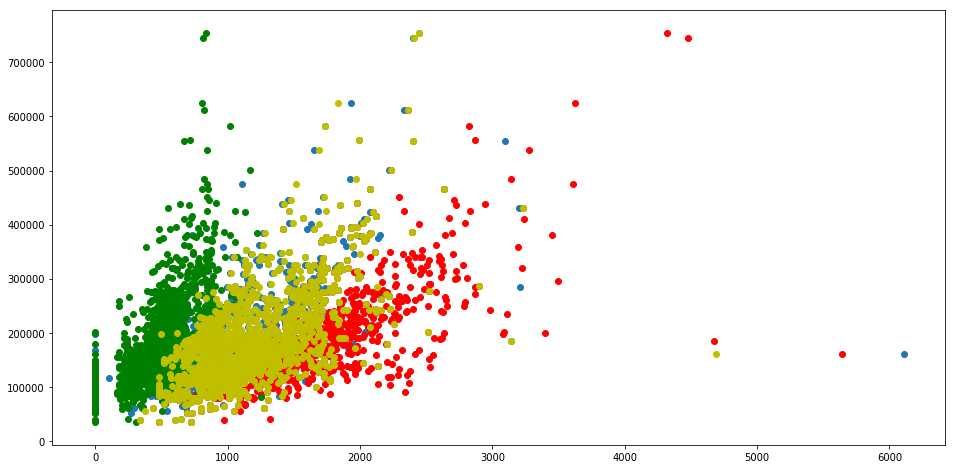

In [8]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

ax.scatter(df_train.TotalBsmtSF, df_train.SalePrice );
ax.scatter(df_train.GrLivArea, df_train.SalePrice, color = 'r');
ax.scatter(df_train.GarageArea, df_train.SalePrice, color = 'g');
ax.scatter(df_train['1stFlrSF'], df_train.SalePrice, color = 'y');

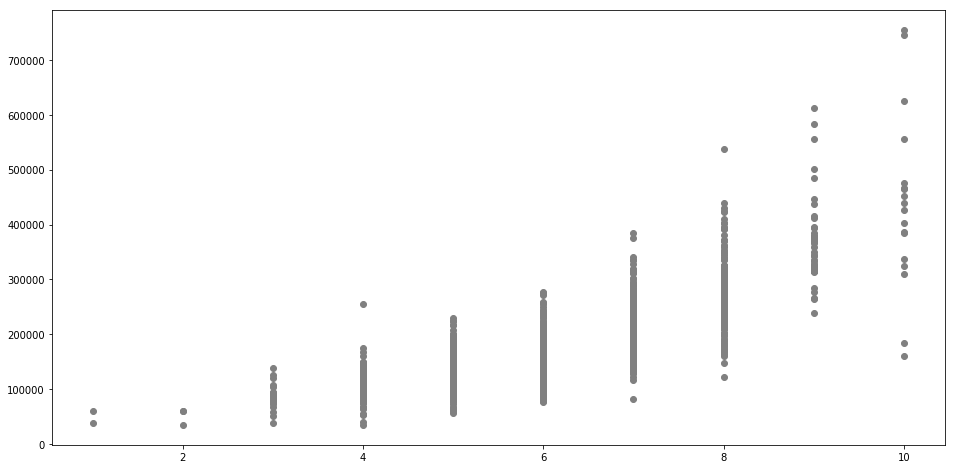

In [9]:
fig, ax = plt.subplots(1,1, figsize = (16,8))
ax.scatter(df_train.OverallQual, df_train.SalePrice, color = 'grey');
plt.show()

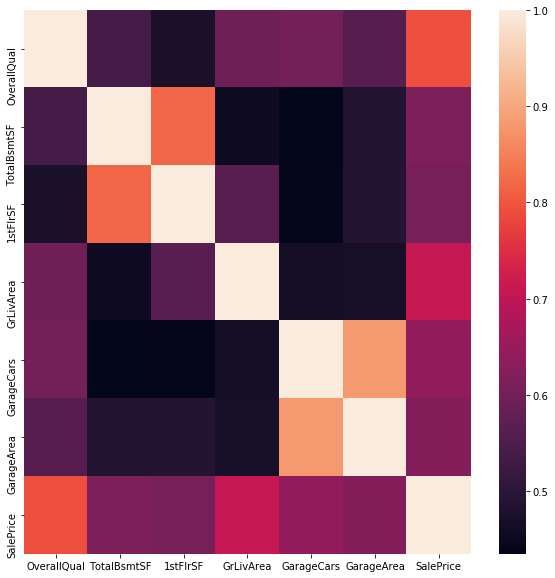

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr());

### I'd like to be using theese values

In [11]:
pd.isnull(df_train).sum()

OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

Not that much more to be cleaned in this dataset

In [12]:
df_train.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1057.429452,1162.626712,1515.463699,1.767123,472.980137,180921.195890
std,1.382997,438.705324,386.587738,525.480383,0.747315,213.804841,79442.502883
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000,34900.000000
25%,5.000000,795.750000,882.000000,1129.500000,1.000000,334.500000,129975.000000
50%,6.000000,991.500000,1087.000000,1464.000000,2.000000,480.000000,163000.000000
75%,7.000000,1298.250000,1391.250000,1776.750000,2.000000,576.000000,214000.000000
max,10.000000,6110.000000,4692.000000,5642.000000,4.000000,1418.000000,755000.000000


Not very visual, i'd like to have a graphic look at this. 

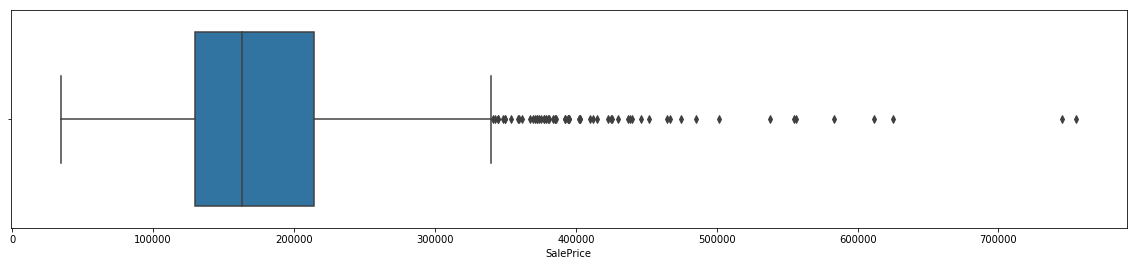

In [13]:
plt.figure(figsize=(20,4))
sns.boxplot(df_train.SalePrice);

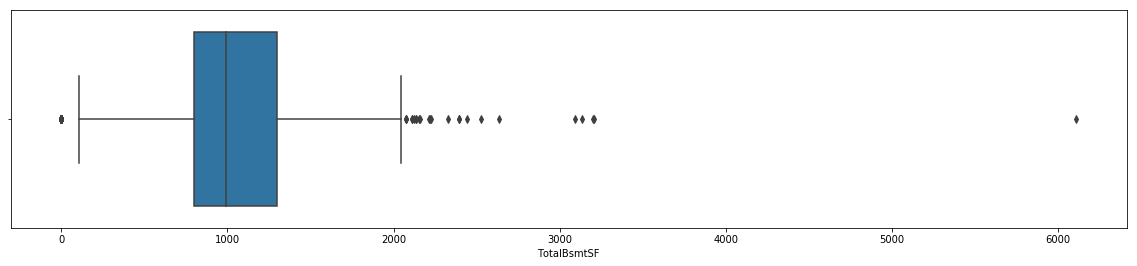

In [14]:
plt.figure(figsize=(20,4))
sns.boxplot(df_train.TotalBsmtSF);

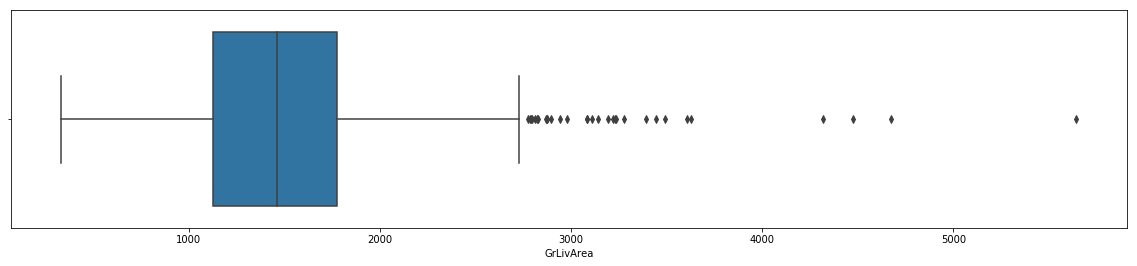

In [15]:
plt.figure(figsize=(20,4))
sns.boxplot(df_train.GrLivArea);

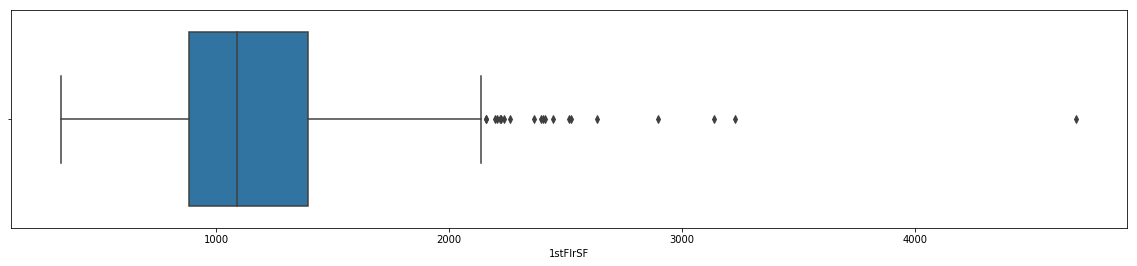

In [16]:
plt.figure(figsize=(20,4))
sns.boxplot(df_train['1stFlrSF']);

Seems like there is some very far high outliers, I want to get rid of thoose before investigating further

In [17]:
df_train.SalePrice = df_train.SalePrice[df_train.SalePrice < 600000]
df_train['1stFlrSF'] = df_train['1stFlrSF'][df_train['1stFlrSF'] < 4000]
df_train.GrLivArea = df_train.GrLivArea[df_train.GrLivArea < 4000]
df_train.TotalBsmtSF = df_train.TotalBsmtSF[df_train.TotalBsmtSF < 5000]

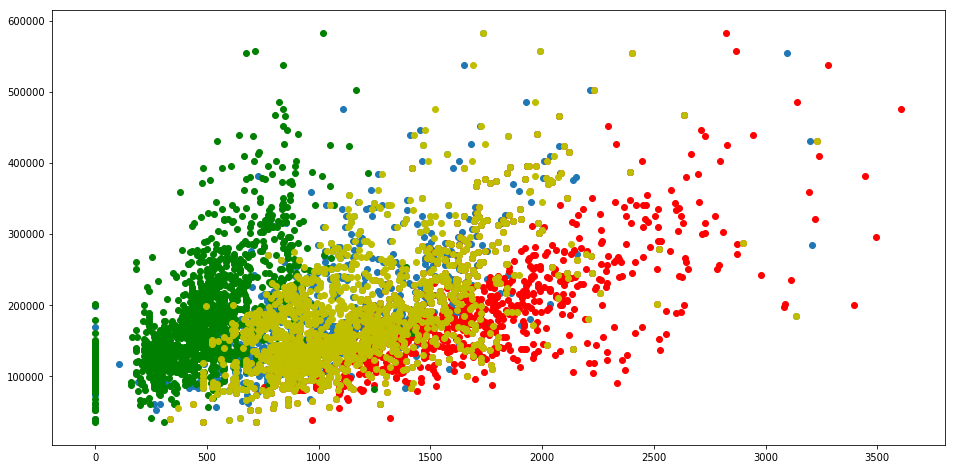

In [18]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

ax.scatter(df_train.TotalBsmtSF, df_train.SalePrice );
ax.scatter(df_train.GrLivArea, df_train.SalePrice, color = 'r');
ax.scatter(df_train.GarageArea, df_train.SalePrice, color = 'g');
ax.scatter(df_train['1stFlrSF'], df_train.SalePrice, color = 'y');

The 0 valued garageareas and totalbsmsf could mess for example a regression up my function up, I wanna fill theese up with the mean for garageareas

In [19]:
df_train.GarageArea = df_train.GarageArea.replace(0, df_train.GarageArea.mean())
df_train.TotalBsmtSF = df_train.TotalBsmtSF.replace(0, df_train.TotalBsmtSF.mean())

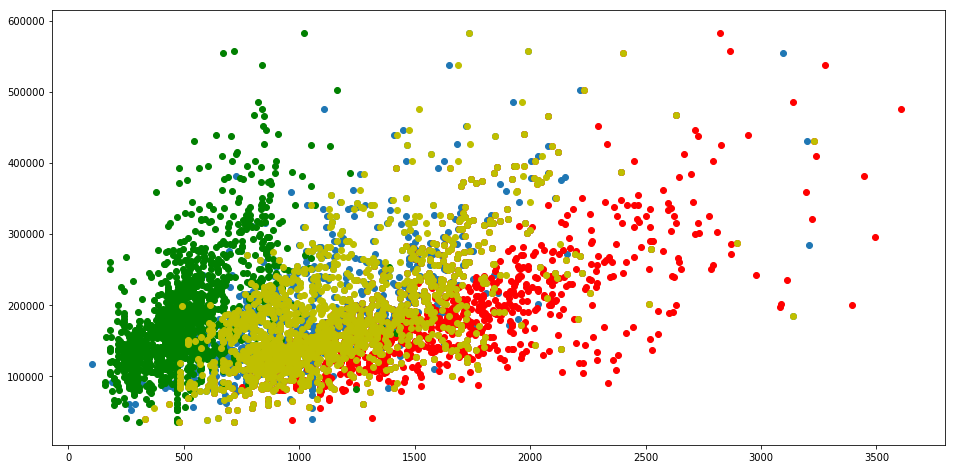

In [20]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

ax.scatter(df_train.TotalBsmtSF, df_train.SalePrice );
ax.scatter(df_train.GrLivArea, df_train.SalePrice, color = 'r');
ax.scatter(df_train.GarageArea, df_train.SalePrice, color = 'g');
ax.scatter(df_train['1stFlrSF'], df_train.SalePrice, color = 'y');

In [21]:
pd.isnull(df_train).sum()

OverallQual    0
TotalBsmtSF    1
1stFlrSF       1
GrLivArea      4
GarageCars     0
GarageArea     0
SalePrice      4
dtype: int64

In [22]:
df_train.TotalBsmtSF = df_train.TotalBsmtSF.fillna(df_train.TotalBsmtSF.mean())
df_train['1stFlrSF'] = df_train['1stFlrSF'].fillna(df_train['1stFlrSF'].mean())
df_train.GrLivArea = df_train.GrLivArea.fillna(df_train.GrLivArea.mean())
df_train.SalePrice = df_train.SalePrice.fillna(df_train.SalePrice.mean())

For this I'd like to do a regression analysis. Since all theese columns are different property areas measured in square meters I'd like to take them all into consideration when constructing the regression model. 

In [23]:
df_train['overall_area_score'] = df_train['TotalBsmtSF'] + df_train['GrLivArea'] + df_train['GarageArea'] + df_train['1stFlrSF']
df_train['overall_avg'] = (df_train.overall_area_score / 4) 

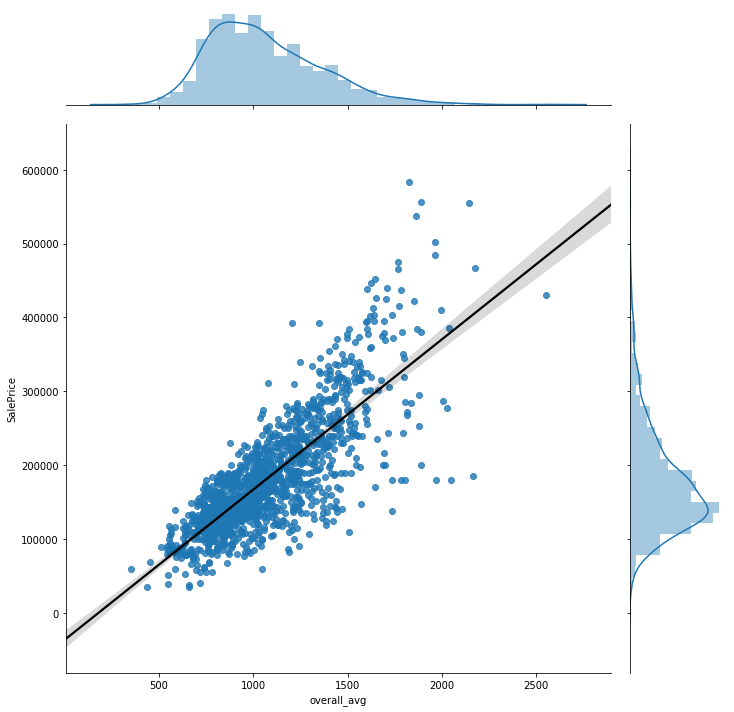

In [24]:
reg_analysis = sns.jointplot(df_train.overall_avg,df_train.SalePrice, kind='reg' , height = 10, joint_kws={'line_kws':{'color':'black'}});

In [65]:
model_values = np.polyfit(df_train.overall_avg, df_train.SalePrice, 1)

m = model_values[1]
k = model_values[0]

def regression_model(x):
    y = (k * x) + m
    return y


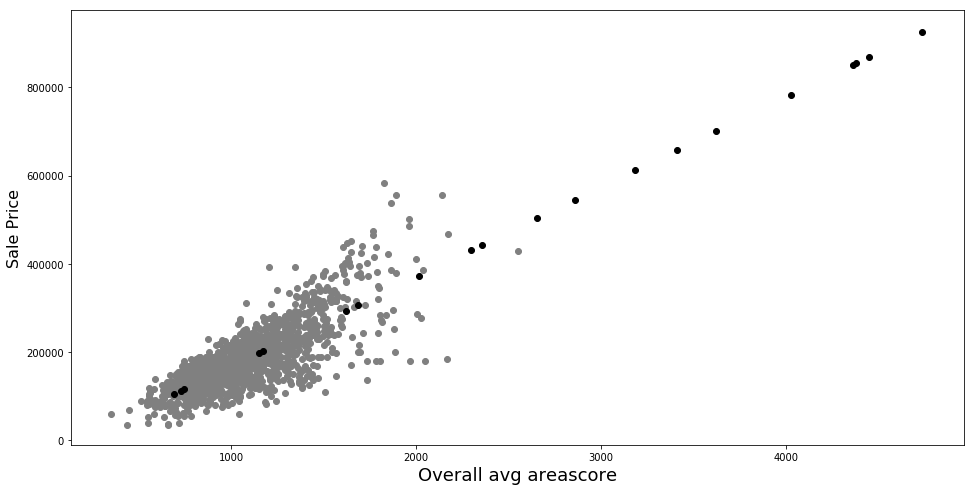

In [105]:
test_areas = np.random.randint(500, high = 5000 , size = 20, dtype = 'int')

fig, ax = plt.subplots(1,1, figsize = (16,8))
r = np.corrcoef(df_train.overall_avg,df_train.SalePrice)

ax.scatter(df_train.overall_avg,df_train.SalePrice, color = 'grey');
ax.scatter(test_areas, regression_model(test_areas), color = 'black');
plt.xlabel('Overall avg areascore', fontsize=18);
plt.ylabel('Sale Price', fontsize=16);

Just to try some random areas, to see the output of the function and that it works properly.